In [1]:
# Runtime/Change runtime type/GPU
# Tensorflow 2.0.0
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 3.8MB 42.4MB/s 
     |████████████████████████████████| 450kB 48.4MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# Import Graphviz
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Exercise 1 - Functional API of Keras

## Preprocessing data
After loading and splitting the data, we need to preprocess them by reshaping them into the shape the network expects and scaling them so that all values are in the \[0, 1\] interval.


In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)
50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a CNN. First we define the Sequential model.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 32)        0

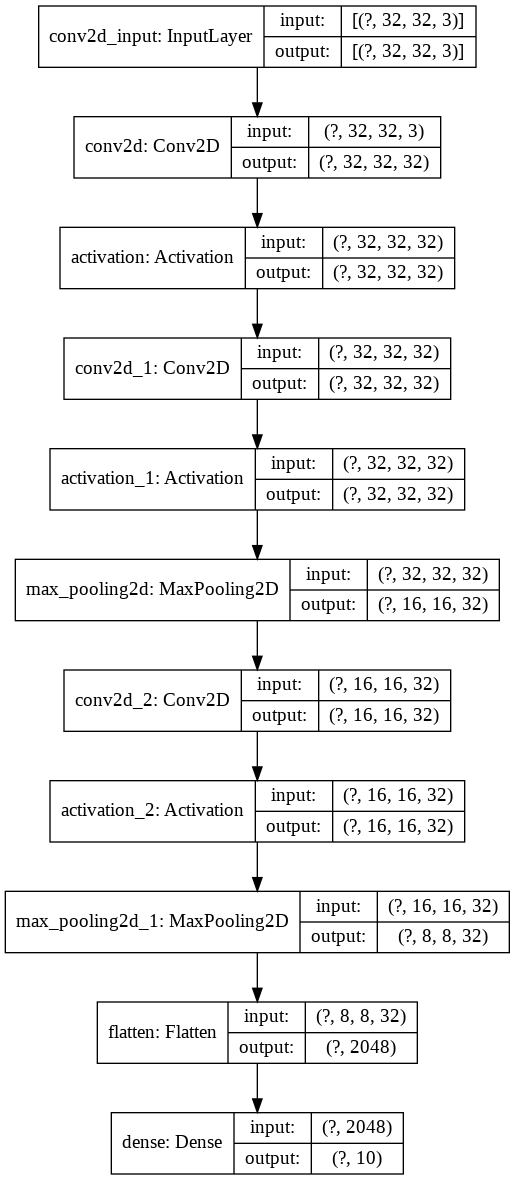

In [6]:
E = 10                   # number of epochs
B = 128                  # batch size

model1 = Sequential() 
model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape = X_train.shape[1:]))# ...
model1.add(Activation('relu'))
model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(units=n_classes, activation='softmax'))

# ... print model infomration with summary() method
model1.summary()
plot_model(model1, show_shapes=True)

In [7]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
start_time = time.time()
log = model1.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 225us/sample - loss: 1.5900 - accuracy: 0.4291 - val_loss: 1.3249 - val_accuracy: 0.5247
Epoch 2/10
50000/50000 [==============================] - 7s 139us/sample - loss: 1.2121 - accuracy: 0.5733 - val_loss: 1.1077 - val_accuracy: 0.6123
Epoch 3/10
50000/50000 [==============================] - 7s 138us/sample - loss: 1.0409 - accuracy: 0.6383 - val_loss: 1.0210 - val_accuracy: 0.6454
Epoch 4/10
50000/50000 [==============================] - 7s 138us/sample - loss: 0.9485 - accuracy: 0.6713 - val_loss: 0.9723 - val_accuracy: 0.6589
Epoch 5/10
50000/50000 [==============================] - 7s 138us/sample - loss: 0.8826 - accuracy: 0.6942 - val_loss: 0.9247 - val_accuracy: 0.6769
Epoch 6/10
50000/50000 [==============================] - 7s 139us/sample - loss: 0.8349 - accuracy: 0.7120 - val_loss: 0.9137 - val_accuracy: 0.6862
Epoch 7/10
50000/50000 [=========================

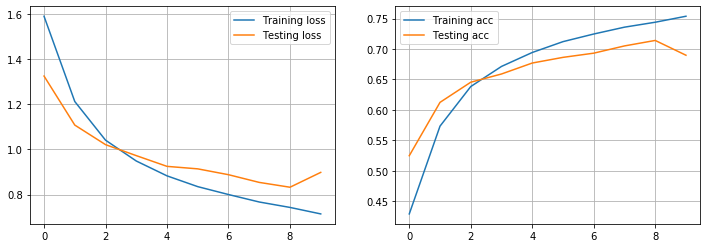

In [8]:
# Loss evaluation during training
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [9]:
# Model evaluation
loss_test, metric_test = model1.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.8980367587089538
Test accuracy: 0.6897


Now we transform the model definition from Sequential to the functional API. We should get the same number of parameters and similar performances between the sequential and functional model.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248  

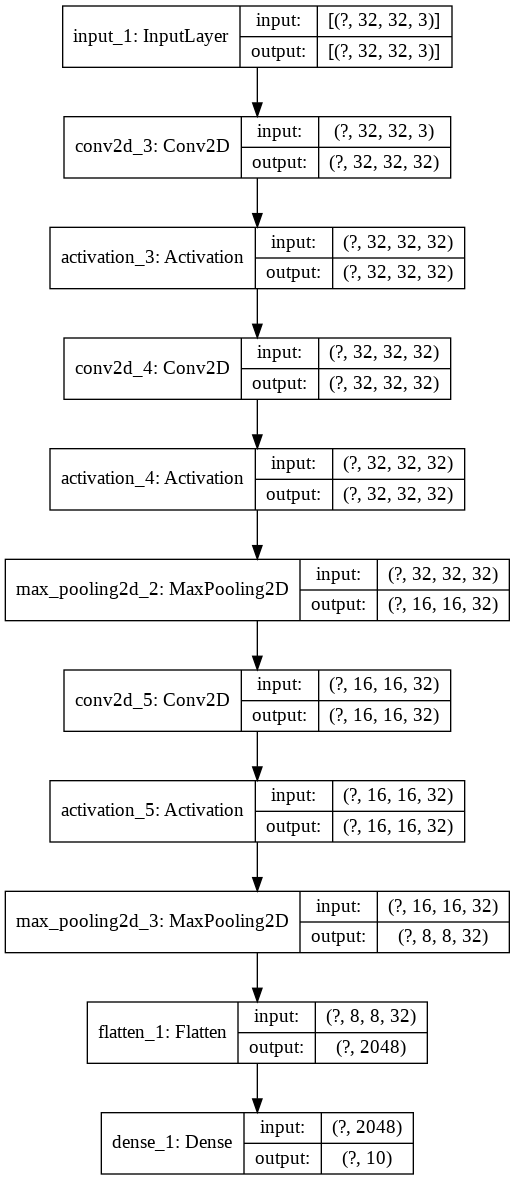

In [10]:
E = 10                   # number of epochs
B = 128                  # batch size

visible = Input(shape=(X_train.shape[1:]))
conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(visible)
activation1 = Activation('relu')(conv1)
conv2 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(activation1)
activation2 = Activation('relu')(conv2)
pool1 = MaxPooling2D(pool_size=(2, 2))(activation2)
conv3 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(pool1)
activation3 = Activation('relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2, 2))(activation3)
flat = Flatten()(pool2)
output = Dense(units=n_classes, activation='softmax')(flat)
model2 = Model(inputs = visible, outputs = output)

model2.summary()
plot_model(model2, show_shapes=True)

In [11]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data
start_time = time.time()
log = model2.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 155us/sample - loss: 1.5686 - accuracy: 0.4410 - val_loss: 1.3097 - val_accuracy: 0.5356
Epoch 2/10
50000/50000 [==============================] - 7s 138us/sample - loss: 1.2009 - accuracy: 0.5798 - val_loss: 1.1029 - val_accuracy: 0.6106
Epoch 3/10
50000/50000 [==============================] - 7s 140us/sample - loss: 1.0365 - accuracy: 0.6380 - val_loss: 1.0106 - val_accuracy: 0.6454
Epoch 4/10
50000/50000 [==============================] - 7s 139us/sample - loss: 0.9319 - accuracy: 0.6771 - val_loss: 0.9378 - val_accuracy: 0.6755
Epoch 5/10
50000/50000 [==============================] - 7s 139us/sample - loss: 0.8693 - accuracy: 0.7002 - val_loss: 0.9222 - val_accuracy: 0.6813
Epoch 6/10
50000/50000 [==============================] - 7s 140us/sample - loss: 0.8172 - accuracy: 0.7199 - val_loss: 0.8767 - val_accuracy: 0.6944
Epoch 7/10
50000/50000 [==========================

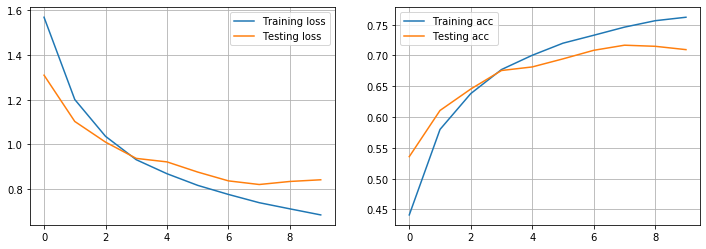

In [12]:
# Loss evaluation during training
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [13]:
# Model evaluation
loss_test, metric_test = model2.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.8422397465705872
Test accuracy: 0.7094


Now we move on with the non-sequential strategies

### Non-sequential Model 1

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 32, 32, 32)   896         input_2[0][0]                    
__________________________________________________________________________________________________
activation_6 (Activation)       (None, 32, 32, 32)   0           conv2d_6[0][0]                   
____________________________________________________________________________________________

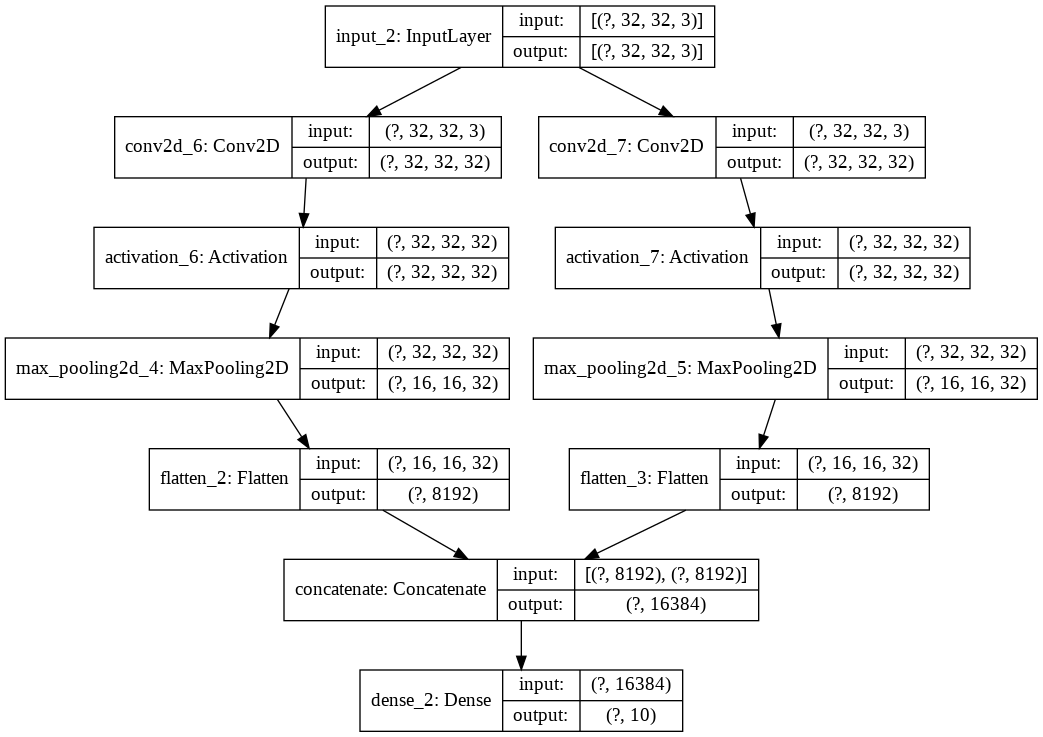

In [14]:
# multiple path
E = 10                   # number of epochs
B = 128                  # batch size

visible = Input(shape=(X_train.shape[1:]))

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(visible)
activation1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(activation1)
flat1 = Flatten()(pool1)

conv2 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(visible)
activation2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(activation2)
flat2 = Flatten()(pool2)

merge = concatenate([flat1, flat2])

output = Dense(units=n_classes, activation='softmax')(merge)
nsmodel1 = Model(inputs = visible, outputs = output)

nsmodel1.summary()
plot_model(nsmodel1, show_shapes=True)

In [15]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')
nsmodel1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


start_time = time.time()
log = nsmodel1.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49664/50000 [============================>.] - ETA: 0s - loss: 1.5106 - accuracy: 0.4731
Epoch 00001: val_accuracy improved from -inf to 0.55390, saving model to model-001.h5
50000/50000 [==============================] - 6s 119us/sample - loss: 1.5095 - accuracy: 0.4735 - val_loss: 1.2834 - val_accuracy: 0.5539
Epoch 2/10
49536/50000 [============================>.] - ETA: 0s - loss: 1.2219 - accuracy: 0.5772
Epoch 00002: val_accuracy improved from 0.55390 to 0.58740, saving model to model-002.h5
50000/50000 [==============================] - 5s 101us/sample - loss: 1.2211 - accuracy: 0.5775 - val_loss: 1.1936 - val_accuracy: 0.5874
Epoch 3/10
49536/50000 [============================>.] - ETA: 0s - loss: 1.1236 - accuracy: 0.6118
Epoch 00003: val_accuracy improved from 0.58740 to 0.60000, saving model to model-003.h5
50000/50000 [==============================] - 5s 100us/sample - loss: 1.1237 - accuracy: 0.6118 - val_loss:

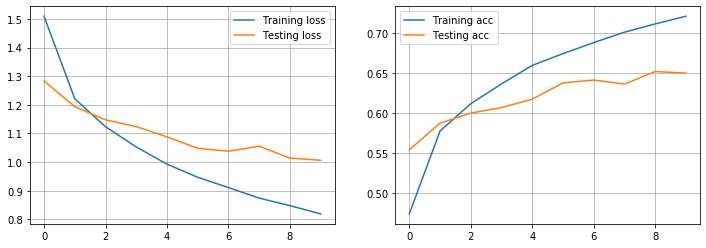

In [16]:
# Loss evaluation during training
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [17]:
# Model evaluation
loss_test, metric_test = nsmodel1.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.0063940342903137
Test accuracy: 0.6502


### Non-sequential Model 2

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 32)   3488        input_3[0][0]                    
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 32, 32, 32)   0           conv2d_8[0][0]                   
____________________________________________________________________________________________

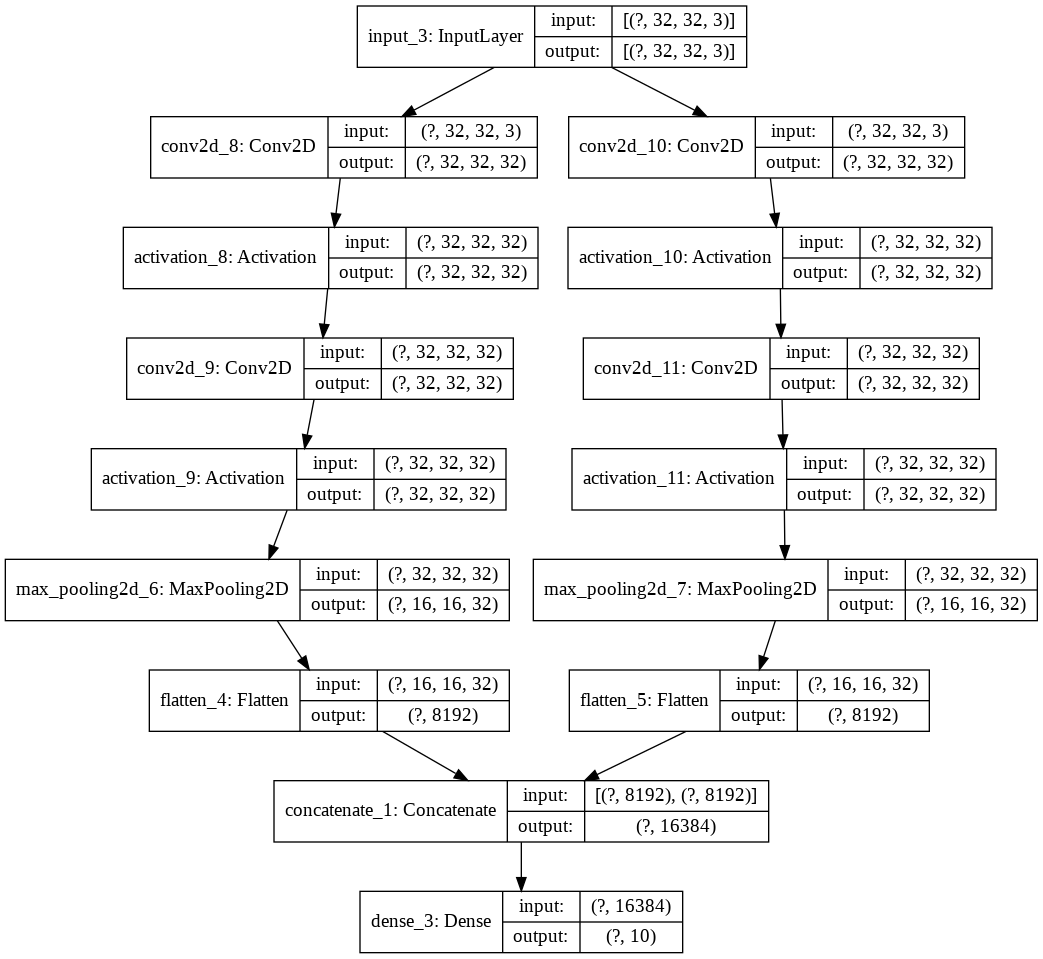

In [18]:
# multiple path
E = 10                   # number of epochs
B = 128                  # batch size

visible = Input(shape=(X_train.shape[1:]))

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(visible)
activation1 = Activation('relu')(conv1)
conv2 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(activation1)
activation2 = Activation('relu')(conv2)
pool1 = MaxPooling2D(pool_size=(2, 2))(activation2)
flat1 = Flatten()(pool1)

conv3 = Conv2D(filters=32, kernel_size=(6, 6), padding='same')(visible)
activation3 = Activation('relu')(conv3)
conv4 = Conv2D(filters=32, kernel_size=(6, 6), padding='same')(activation3)
activation4 = Activation('relu')(conv4)
pool2 = MaxPooling2D(pool_size=(2, 2))(activation4)
flat2 = Flatten()(pool2)

merge = concatenate([flat1, flat2])

output = Dense(units=n_classes, activation='softmax')(merge)
nsmodel2 = Model(inputs = visible, outputs = output)

nsmodel2.summary()
plot_model(nsmodel2, show_shapes=True)

In [19]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')
nsmodel2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


start_time = time.time()
log = nsmodel2.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.4795 - accuracy: 0.4774
Epoch 00001: val_accuracy improved from -inf to 0.57740, saving model to model-001.h5
50000/50000 [==============================] - 18s 351us/sample - loss: 1.4789 - accuracy: 0.4775 - val_loss: 1.2028 - val_accuracy: 0.5774
Epoch 2/10
49792/50000 [============================>.] - ETA: 0s - loss: 1.0859 - accuracy: 0.6256
Epoch 00002: val_accuracy improved from 0.57740 to 0.64220, saving model to model-002.h5
50000/50000 [==============================] - 16s 323us/sample - loss: 1.0858 - accuracy: 0.6257 - val_loss: 1.0373 - val_accuracy: 0.6422
Epoch 3/10
49792/50000 [============================>.] - ETA: 0s - loss: 0.9344 - accuracy: 0.6772
Epoch 00003: val_accuracy improved from 0.64220 to 0.66900, saving model to model-003.h5
50000/50000 [==============================] - 16s 322us/sample - loss: 0.9341 - accuracy: 0.6773 - val_lo

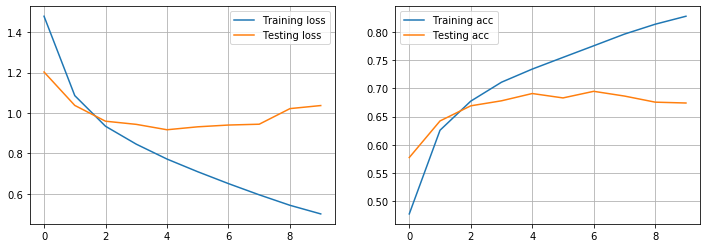

In [20]:
# Loss evaluation during training
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [21]:
# Model evaluation
loss_test, metric_test = nsmodel2.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.0366289818763732
Test accuracy: 0.674


### Non-sequential Model 3

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 32)   896         input_4[0][0]                    
__________________________________________________________________________________________________
activation_12 (Activation)      (None, 32, 32, 32)   0           conv2d_12[0][0]                  
__________________________________________________________________________________________________
dropout (Dropout)               (None, 32, 32, 32)   0           activation_12[0][0]              
____________________________________________________________________________________________

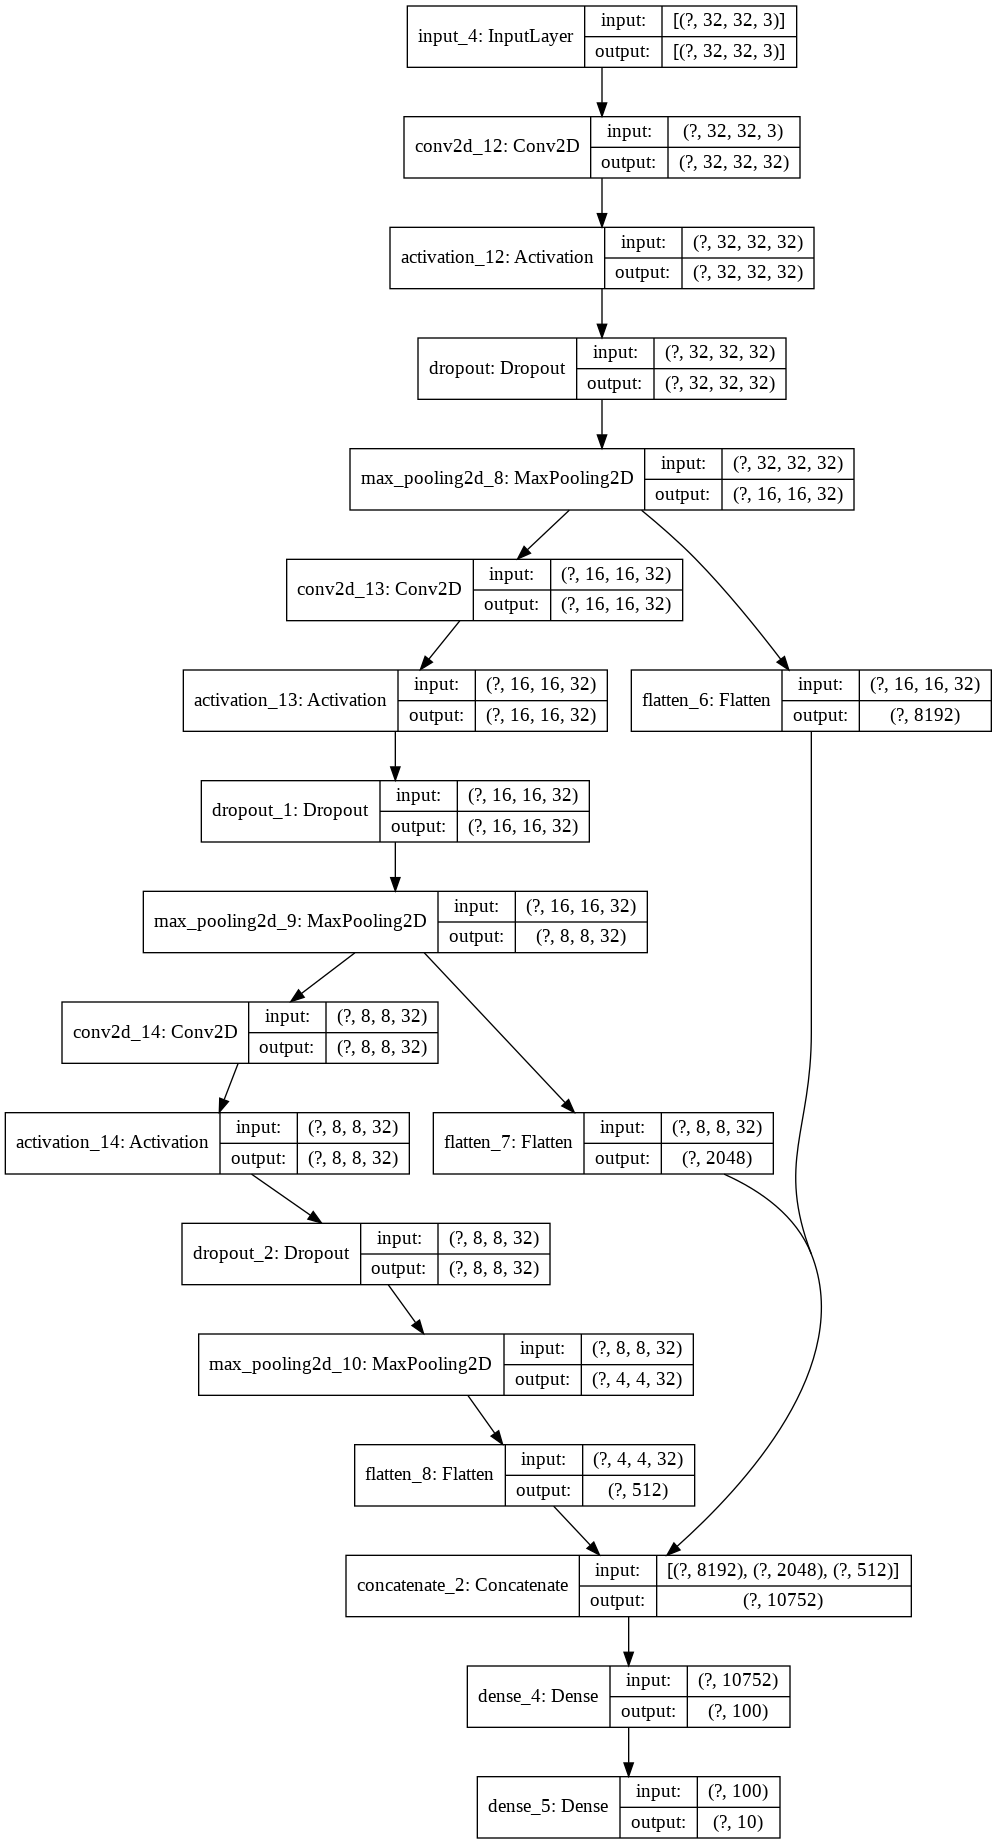

In [22]:
# multiple features
E = 10                   # number of epochs
B = 128                  # batch size

visible = Input(shape=(X_train.shape[1:]))

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(visible)
activation1 = Activation('relu')(conv1)
drop1 = Dropout(0.2)(activation1)
pool1 = MaxPooling2D(pool_size=(2, 2))(drop1)
flat1 = Flatten()(pool1)

conv2 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(pool1)
activation2 = Activation('relu')(conv2)
drop2 = Dropout(0.2)(activation2)
pool2 = MaxPooling2D(pool_size=(2, 2))(drop2)
flat2 = Flatten()(pool2)

conv3 = Conv2D(filters=32, kernel_size=(6, 6), padding='same')(pool2)
activation3 = Activation('relu')(conv3)
drop3 = Dropout(0.2)(activation3)
pool3 = MaxPooling2D(pool_size=(2, 2))(drop3)
flat3 = Flatten()(pool3)

merge = concatenate([flat1, flat2, flat3])

hidden1 = Dense(100, activation='relu')(merge)

output = Dense(units=n_classes, activation='softmax')(hidden1)
nsmodel3 = Model(inputs = visible, outputs = output)

nsmodel3.summary()
plot_model(nsmodel3, show_shapes=True)

In [23]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')
nsmodel3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


start_time = time.time()
log = nsmodel3.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.6898 - accuracy: 0.3890
Epoch 00001: val_accuracy improved from -inf to 0.49800, saving model to model-001.h5
50000/50000 [==============================] - 8s 153us/sample - loss: 1.6891 - accuracy: 0.3893 - val_loss: 1.4239 - val_accuracy: 0.4980
Epoch 2/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.2795 - accuracy: 0.5395
Epoch 00002: val_accuracy improved from 0.49800 to 0.53900, saving model to model-002.h5
50000/50000 [==============================] - 7s 135us/sample - loss: 1.2792 - accuracy: 0.5397 - val_loss: 1.2849 - val_accuracy: 0.5390
Epoch 3/10
49792/50000 [============================>.] - ETA: 0s - loss: 1.1198 - accuracy: 0.6029
Epoch 00003: val_accuracy improved from 0.53900 to 0.55440, saving model to model-003.h5
50000/50000 [==============================] - 7s 135us/sample - loss: 1.1195 - accuracy: 0.6031 - val_loss:

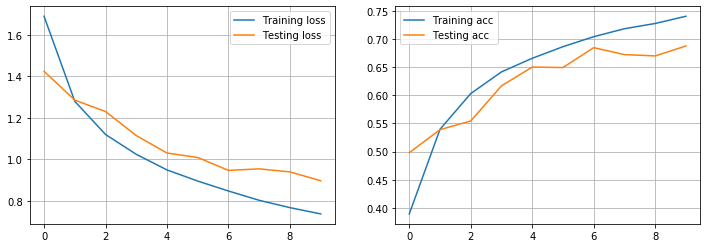

In [24]:
# Loss evaluation during training
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [25]:
# Model evaluation
loss_test, metric_test = nsmodel3.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.8965108499526978
Test accuracy: 0.6876


### Non-sequential Model 4

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 32)   896         input_5[0][0]                    
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 32, 32, 32)   0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 32, 32, 32)   0           activation_15[0][0]              
____________________________________________________________________________________________

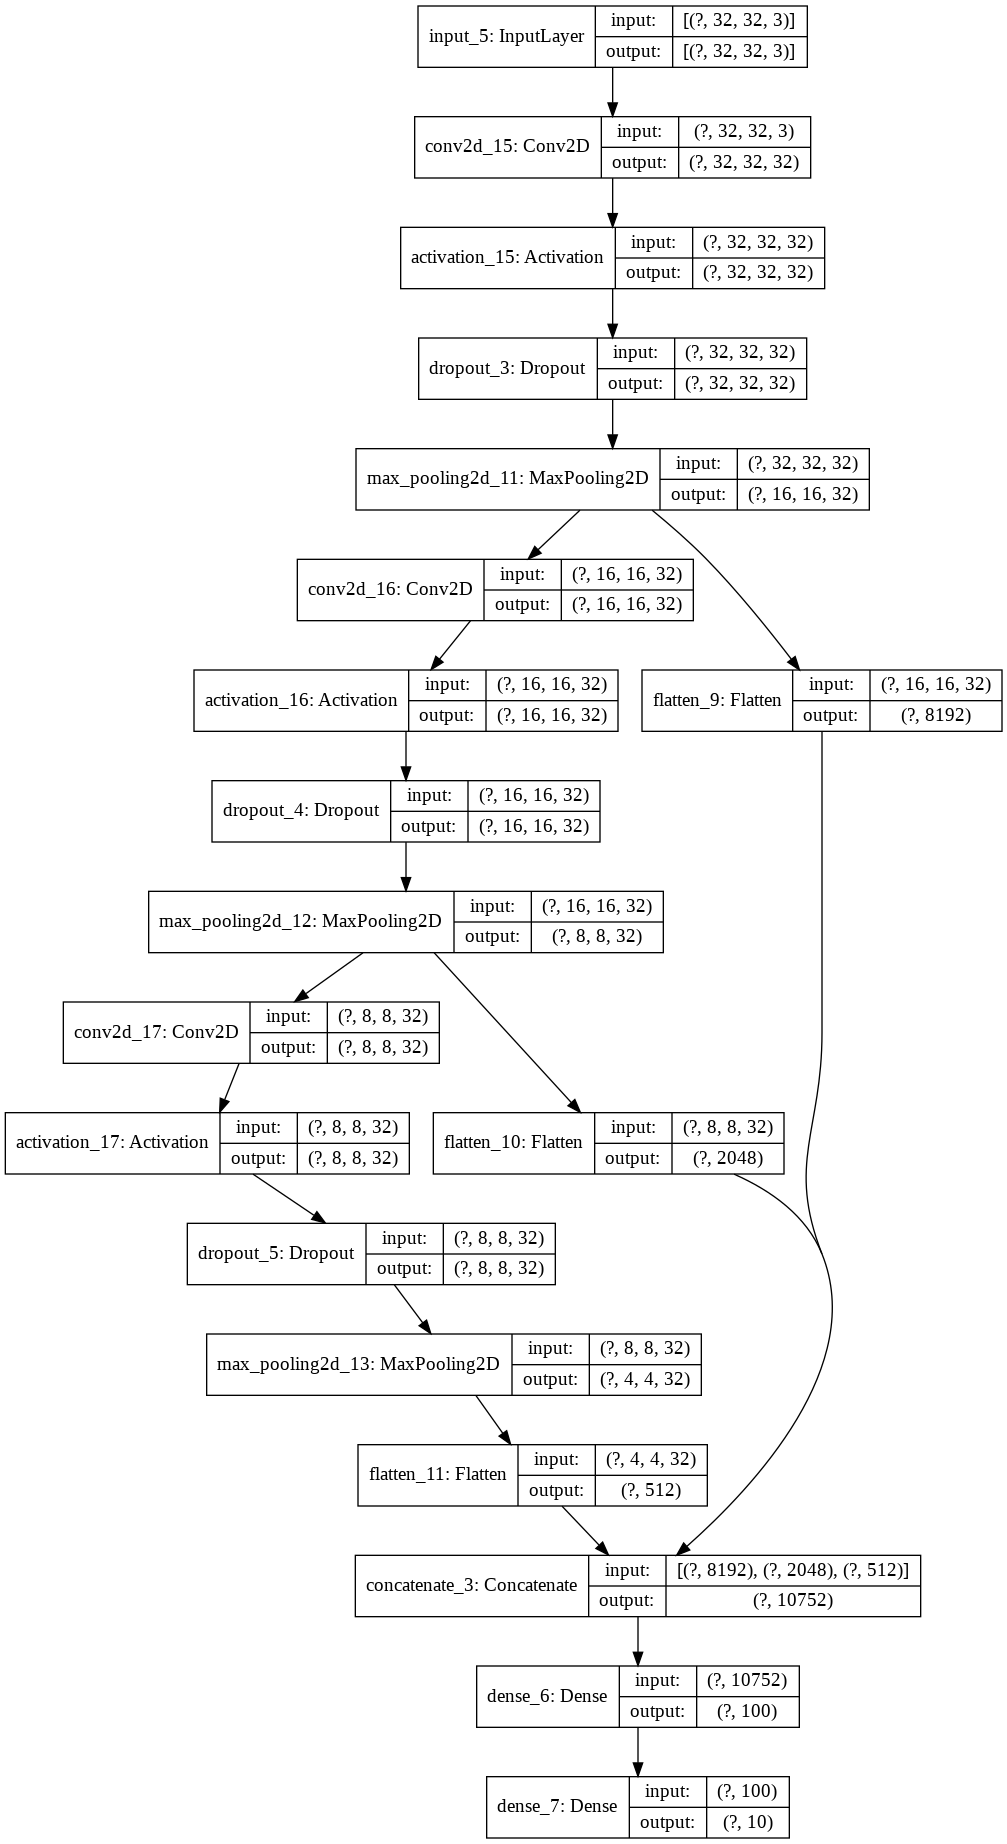

In [26]:
# multiple features
E = 10                   # number of epochs
B = 128                  # batch size

visible = Input(shape=(X_train.shape[1:]))

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(visible)
activation1 = Activation('relu')(conv1)
drop1 = Dropout(0.2)(activation1)
pool1 = MaxPooling2D(pool_size=(2, 2))(drop1)
flat1 = Flatten()(pool1)

conv2 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(pool1)
activation2 = Activation('relu')(conv2)
drop2 = Dropout(0.2)(activation2)
pool2 = MaxPooling2D(pool_size=(2, 2))(drop2)
flat2 = Flatten()(pool2)

conv3 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(pool2)
activation3 = Activation('relu')(conv3)
drop3 = Dropout(0.2)(activation3)
pool3 = MaxPooling2D(pool_size=(2, 2))(drop3)
flat3 = Flatten()(pool3)

merge = concatenate([flat1, flat2, flat3])

hidden1 = Dense(100, activation='relu')(merge)

output = Dense(units=n_classes, activation='softmax')(hidden1)
nsmodel4 = Model(inputs = visible, outputs = output)

nsmodel4.summary()
plot_model(nsmodel4, show_shapes=True)

In [27]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')
nsmodel4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


start_time = time.time()
log = nsmodel4.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49664/50000 [============================>.] - ETA: 0s - loss: 1.5342 - accuracy: 0.4503
Epoch 00001: val_accuracy improved from -inf to 0.52770, saving model to model-001.h5
50000/50000 [==============================] - 7s 150us/sample - loss: 1.5331 - accuracy: 0.4506 - val_loss: 1.3383 - val_accuracy: 0.5277
Epoch 2/10
49792/50000 [============================>.] - ETA: 0s - loss: 1.1855 - accuracy: 0.5848
Epoch 00002: val_accuracy improved from 0.52770 to 0.57350, saving model to model-002.h5
50000/50000 [==============================] - 6s 129us/sample - loss: 1.1852 - accuracy: 0.5850 - val_loss: 1.2081 - val_accuracy: 0.5735
Epoch 3/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.0402 - accuracy: 0.6377
Epoch 00003: val_accuracy improved from 0.57350 to 0.63880, saving model to model-003.h5
50000/50000 [==============================] - 6s 129us/sample - loss: 1.0403 - accuracy: 0.6377 - val_loss:

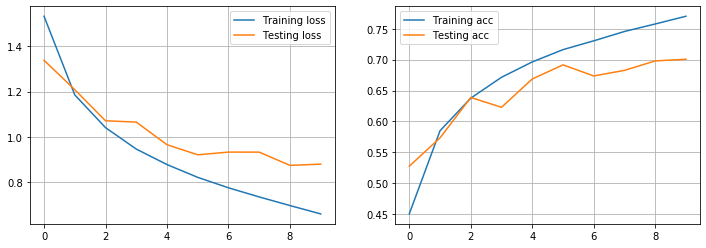

In [28]:
# Loss evaluation during training
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [29]:
# Model evaluation
loss_test, metric_test = nsmodel4.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.8788991913795471
Test accuracy: 0.7006


### Non-sequential model 5

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 32, 32, 32)   896         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 32, 32, 64)   1792        input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 32, 32, 128)  3584        input_9[0][0]                    
____________________________________________________________________________________________

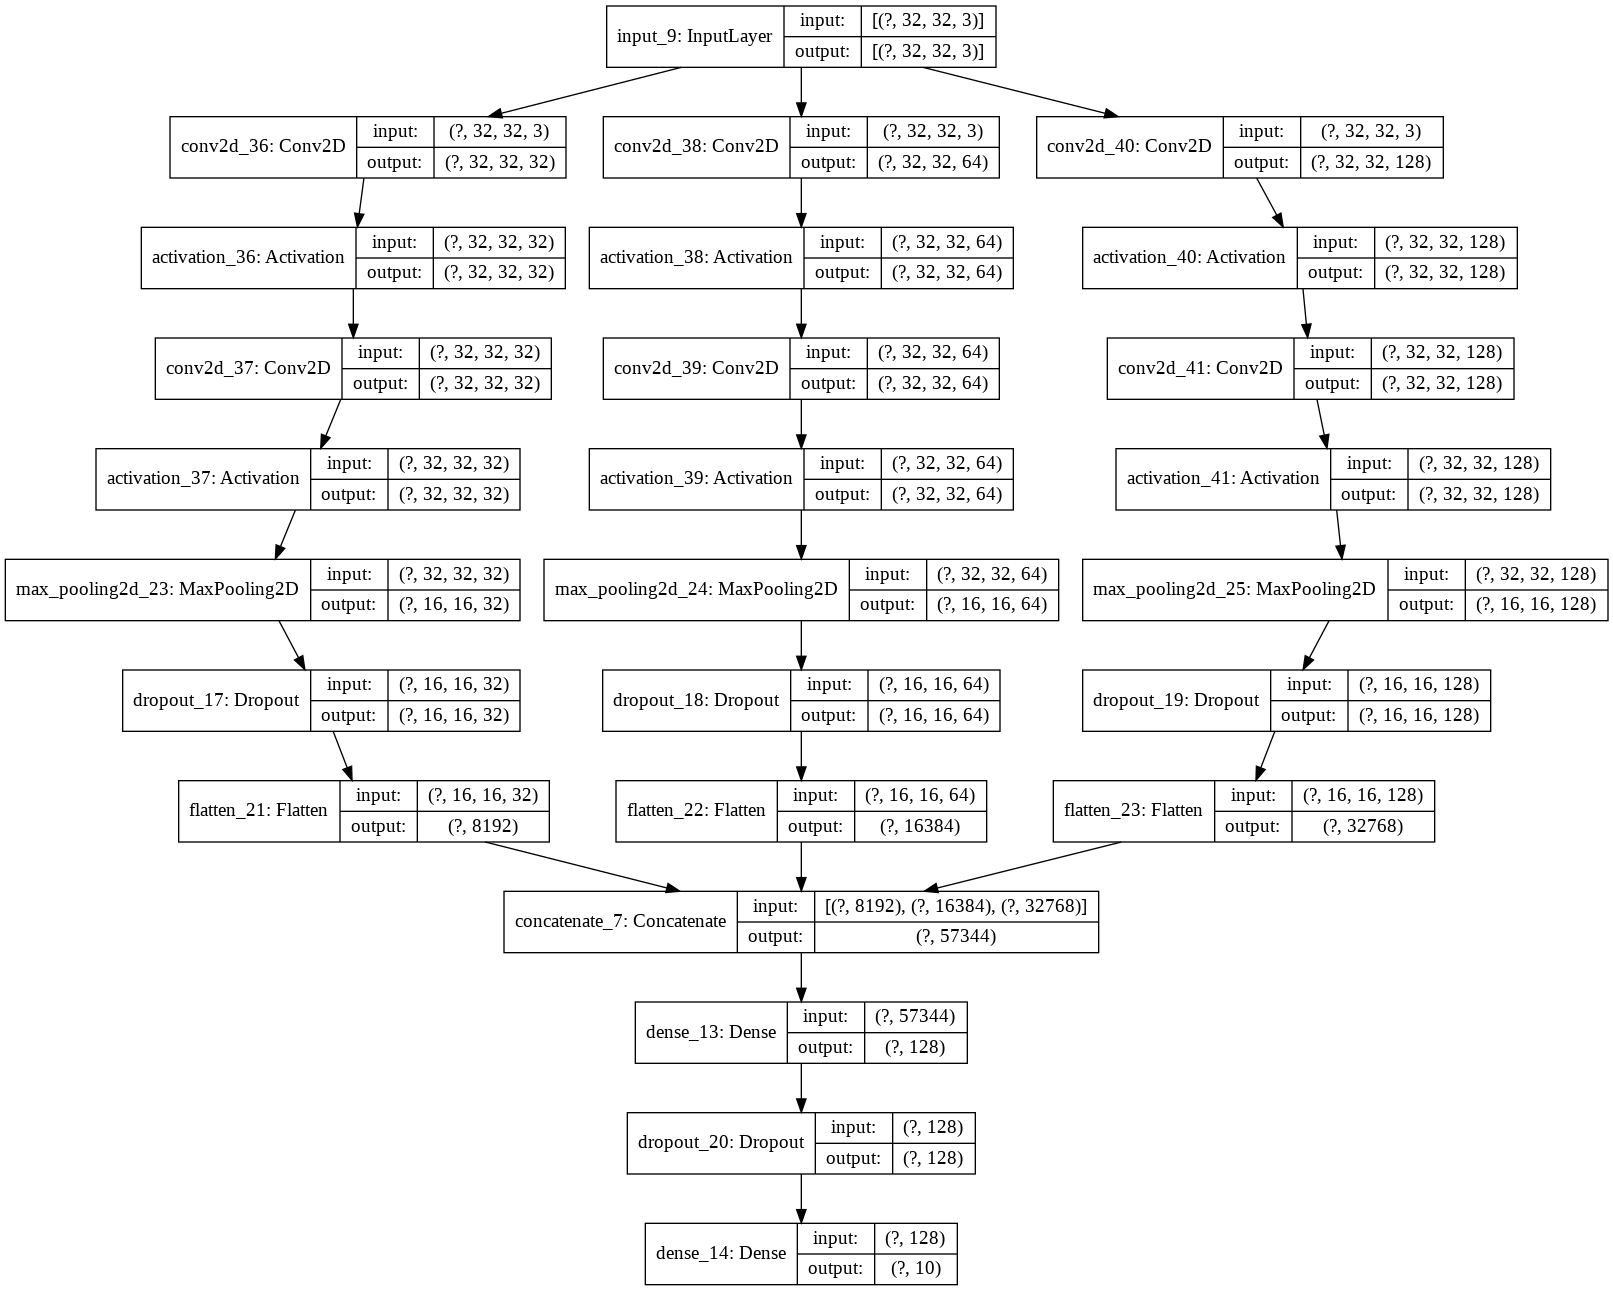

In [34]:
# multiple path
E = 10                   # number of epochs
B = 128                  # batch size

visible = Input(shape=(X_train.shape[1:]))

conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(visible)
activation1 = Activation('relu')(conv1)
conv2 = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(activation1)
activation2 = Activation('relu')(conv2)
pool1 = MaxPooling2D(pool_size=(2, 2))(activation2)
drop1 = Dropout(0.25)(pool1)
flat1 = Flatten()(drop1)

conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(visible)
activation3 = Activation('relu')(conv3)
conv4 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(activation3)
activation4 = Activation('relu')(conv4)
pool2 = MaxPooling2D(pool_size=(2, 2))(activation4)
drop2 = Dropout(0.25)(pool2)
flat2 = Flatten()(drop2)

conv5 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(visible)
activation5 = Activation('relu')(conv5)
conv6 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(activation5)
activation6 = Activation('relu')(conv6)
pool3 = MaxPooling2D(pool_size=(2, 2))(activation6)
drop3 = Dropout(0.25)(pool3)
flat3 = Flatten()(drop3)

merge = concatenate([flat1, flat2, flat3])

hidden1 = Dense(units=128, activation='relu')(merge)
drop4 = Dropout(0.5)(hidden1)
output = Dense(units=n_classes, activation='softmax')(drop4)
nsmodel5 = Model(inputs = visible, outputs = output)

nsmodel5.summary()
plot_model(nsmodel5, show_shapes=True)

In [35]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')
nsmodel5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


start_time = time.time()
log = nsmodel5.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpoint])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.7424 - accuracy: 0.3725
Epoch 00001: val_accuracy improved from -inf to 0.53310, saving model to model-001.h5
50000/50000 [==============================] - 41s 812us/sample - loss: 1.7419 - accuracy: 0.3726 - val_loss: 1.3356 - val_accuracy: 0.5331
Epoch 2/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.3743 - accuracy: 0.5063
Epoch 00002: val_accuracy improved from 0.53310 to 0.59410, saving model to model-002.h5
50000/50000 [==============================] - 40s 792us/sample - loss: 1.3742 - accuracy: 0.5063 - val_loss: 1.1686 - val_accuracy: 0.5941
Epoch 3/10
49920/50000 [============================>.] - ETA: 0s - loss: 1.2362 - accuracy: 0.5575
Epoch 00003: val_accuracy improved from 0.59410 to 0.63360, saving model to model-003.h5
50000/50000 [==============================] - 39s 788us/sample - loss: 1.2360 - accuracy: 0.5576 - val_lo

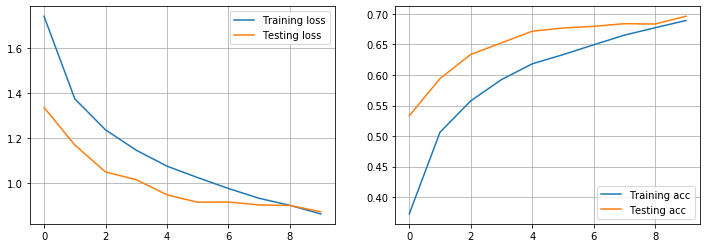

In [36]:
# Loss evaluation during training
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [45]:
# Model evaluation
loss_test, metric_test = nsmodel5.evaluate(X_test, Y_test, verbose=0) # ... evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.871491855430603
Test accuracy: 0.6961


### Table of performances

| Model | Architecture description | Callback | Acc. train | Acc. test |
|-------|--------------------------|----------|------------|-----------|
|  Ns 1 | multiple path: 2 Paths, CONV-RELU-POOL with the same filter size (3, 3) in both paths | yes |  0.7215 | 0.6502 |
|  Ns 2 | multiple path: Same as Ns 1 but different filter sizes (3, 3) and (6, 6) in the different paths | yes |  0.8277 | 0.6740 |
|  Ns 3 | multiple features: 3 Features, CONV-RELU-DROP-POOL with two features with (3, 3) filter size and one feature with (6, 6) filter size | yes |  0.7404 | 0.6876 |
|  Ns 4 | multiple features: Same as Ns 3 but same filter sizes (3, 3) in every of the three features | yes |  0.7701 | 0.7006 |
|  Ns 5 | multiple path: 3 Paths, CONV-RELU-CONV-RELU-POOL-DROP with different number of filters in every path, 32-64-128 | yes |  0.6891 | 0.6961 |